<a href="https://colab.research.google.com/github/Ketaki-conda/Blog/blob/master/AudioSignalProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sp
from scipy.io.wavfile import read
from scipy.io.wavfile import write    
from scipy import signal
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

In [2]:
(Frequency, array) = read('drive/MyDrive/eagle.wav')

In [3]:
len(array)

55808

Text(0, 0.5, 'Amplitude')

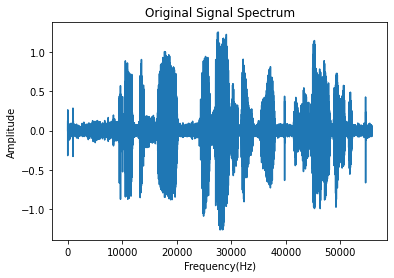

In [4]:
plt.plot(array) 
plt.title('Original Signal Spectrum')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')

In [7]:
FourierTransformation = sp.fft.fft(array) # Calculating the fourier transformation of the signal

In [13]:
import numpy as np

scale = np.linspace(0, Frequency, len(array))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Amplitude')

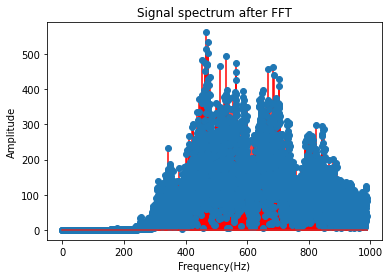

In [14]:
plt.stem(scale[0:5000], np.abs(FourierTransformation[0:5000]), 'r')  # The size of our diagram
plt.title('Signal spectrum after FFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')

In [15]:
GuassianNoise = np.random.rand(len(FourierTransformation)) # Adding guassian Noise to the signal.


In [16]:
NewSound = GuassianNoise + array

In [17]:
write("New-Sound-Added-With-Guassian-Noise.wav", Frequency, NewSound) # Saving it to the file.

In [18]:
b,a = signal.butter(5, 1000/(Frequency/2), btype='highpass') # ButterWorth filter 4350

Text(0, 0.5, 'Amplitude')

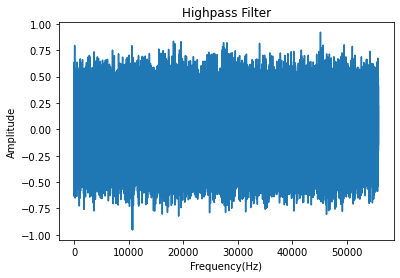

In [19]:
filteredSignal = signal.lfilter(b,a,NewSound)
plt.plot(filteredSignal) # plotting the signal.
plt.title('Highpass Filter')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

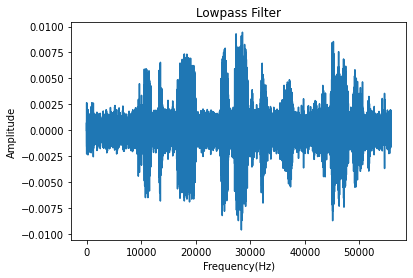

In [20]:
c,d = signal.butter(5, 380/(Frequency/2), btype='lowpass') # ButterWorth low-filter
newFilteredSignal = signal.lfilter(c,d,filteredSignal) # Applying the filter to the signal
plt.plot(newFilteredSignal) # plotting the signal.
plt.title('Lowpass Filter')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')

In [21]:
write("New-Filtered-Eagle-Sound.wav", Frequency, newFilteredSignal) # Saving it to the file.